# Dimensionality Reduction

In this exercise, we will learn several dimensionality reduction methods using the Penguin dataset.

## Preprocessing


In [15]:
import seaborn as sns
import pandas as pd
import numpy as np

# Load the penguins dataset
data_table = sns.load_dataset("penguins")
data_table.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


We will use (1) species as the *class* labels, and (2) other columns as the *features*.

Let's preprocess the data by 
1. Impute the missing value with the most frequent value
2. Represent the categorical variables using one-hot encoding

Let's create variable `y` and variable `X` for the class and features, respectively.


In [16]:
# TODO: Impute the missing values
for column in data_table.columns:
    data_table[column] = data_table[column].fillna(
        data_table[column].dropna().mode()[0]
    )

In [29]:
# TODO: Represent the island and sex using one-hot encoding
categorical_cols = ["island", "sex"]
prep_data_table = pd.get_dummies(data_table, columns=categorical_cols, drop_first=True)

X = prep_data_table.drop(columns=["species"]).values.astype(float)
y = prep_data_table["species"].values
feature_cols = prep_data_table.drop(columns=["species"]).columns

In [31]:
X = X.astype(float)
ylabel, yids = np.unique(y, return_inverse=True)

# Principal Component Analysis

Let's implement PCA using numpy. 
1. Center the data (the average of each feature is 0)
2. Compute the covariance matrix
3. Compute the 2 eigenvectors with the largest eigenvalues
4. Project X to 2D by using the eigenvectors


In [32]:
import numpy as np

# TODO: Center the data
Xc = X - X.mean(axis=0)

# TODO: Compute the covariance matrix
Cov = Xc.T @ Xc / (Xc.shape[0] - 1)

# TODO: Compute the 2 largest eigenvalues and corresponding eigenvectors
# Use np.linalg.eig or scipy.linalg.eigs
w, v = np.linalg.eig(Cov)
order = np.argsort(-w)[:2]
w, v = w[order], v[:, order]

# TODO: Project the data onto the 2D by using the eigenvectors
Xproj = Xc @ v

Let's visualize the projected data. Your todo is to properly labels X and Y as "PC1" and "PC2", respectively. You can do this by ax.set_xlabel and ax.set_ylabel.


Text(0, 0.5, 'PC2')

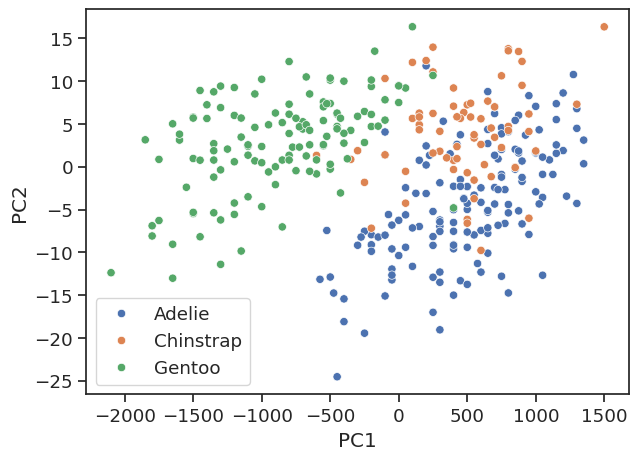

In [35]:
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set(font_scale=1.2)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.scatterplot(x=Xproj[:, 0], y=Xproj[:, 1], hue=y)

# Label your axis.
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")